# Математическая статистика
## Практическое задание 5

В данном задании предлагается провести некоторое исследование модели линейной регрессии и критериев для проверки статистических гипотез, в частности применить этим модели к реальным данным.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 5"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `5.N.ipynb` и `5.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 7 баллов
* Задача 2 - 2 балла
* Задача 3<font size="5" color="red">\*</font> - 3 балла
* Задача 4 - 2 балла
* Задача 5<font size="5" color="red">\*</font> - 10 баллов
* Задача 6 - 5 баллов
* Задача 7 - 4 балла
* Задача 8<font size="5" color="red">\*</font> - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 10 баллов

## 1. Линейная регрессия

**Задача 1.** По шаблону напишите класс, реализующий линейную регрессию. Интерфейс этого класса в некоторой степени соответствует классу <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">`LinearRegression`</a> из библиотеки `sklearn`.

Пусть $\theta = (X^{T} X)^{-1} X^{T} Y$
Тогда несмещенной оценкой для $\sigma^2$ является
${\sigma}^2 = \dfrac{1}{n - k} || Y - X\theta ||^{2}$

Доверительный интервал уровня доверия $\alpha$ для $theta_i$ равен $(\theta_i - \sqrt{a_{i,i}\sigma^2}u_{\frac{\alpha + 1}{2}}, \theta_i - \sqrt{a_{i,i}\sigma^2}u_{\frac{-\alpha + 1}{2}})$, где $a$ - элементы матрицы $(X^{T} X)^{-1}$, $u$ - квантили распределения $T_{n-k}$

In [7]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression as LR
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

C:\Users\Maxim\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
class LinearRegression:
    def __init__(self):
        super()
        
    def fit(self, X, Y, alpha=0.95):
        ''' Обучение модели. Предполагается модель Y = X * theta + epsilon, 
            где X --- регрессор, Y --- отклик,
            а epsilon имеет нормальное распределение с параметрами (0, sigma^2 * I_n).
            alpha --- уровень доверия для доверительного интервала.
        '''
        
        self.n, self.k = X.shape
        
#        self.theta = МНК-оценка
#        self.sigma_sq = несмещенная оценка для sigma^2
#        self.conf_int = доверительные интервалы для коэффициентов (матрица размера k x 2)
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ Y
        self.sigma = np.sum((Y - X @ self.theta) ** 2) / (self.n - self.k)
        self.helpful_slip = np.tile([sps.t(df=self.n - self.k).ppf((alpha + 1) / 2), sps.t(df=self.n - self.k).ppf((-alpha + 1) / 2)], (self.k, 1))
        self.slip = np.tile(np.sqrt(np.diag(np.linalg.inv(X.T @ X)) * self.sigma), (2, 1)).T * self.helpful_slip
        self.confidence_interval = np.tile(self.theta, (2, 1)).T - self.slip
        return self
    
    def summary(self):
        print('Linear regression on %d features and %d examples' % (self.k, self.n))
        print('Sigma: %.6f' % self.sigma)
        print('\t\tLower\t\tEstimation\tUpper')
        for j in range(self.k):
            print('theta_%d:\t%.6f\t%.6f\t%.6f' % (j, self.confidence_interval[j, 0], 
                                                   self.theta[j], self.confidence_interval[j, 1]))
        
    def predict(self, X):
        ''' Возвращает предсказание отклика на новых объектах X. '''
        
        Y_pred = X @ self.theta
        return Y_pred

Загрузите данные о потреблении мороженного в зависимости от температуры воздуха и цены (файл `ice_cream.txt`).
Примените реализованный выше класс линейной регрессии к этим данным предполагая, что модель имеет вид $ic = \theta_1 + \theta_2\ t$, где $t$ --- температура воздуха (столбец `temp`), $ic$ --- постребление мороженного в литрах на человека (столбец `IC`).
Значения температуры предварительно переведите из Фаренгейта в Цельсий [(Фаренгейт — 32) / 1,8 = Цельсий].

К обученной модели примените фунцию `summary` и постройте график регрессии, то есть график прямой $ic = \widehat{\theta}_1 + \widehat{\theta}_2\ t$, где $\widehat{\theta}_1, \widehat{\theta}_2$ --- МНК-оценки коэффициентов.
На график нанесите точки выборки.
Убедитесь, что построейнный график совпадает с графиком из презентации с первой лекции, правда, с точностью до значений температура (она была неправильно переведена из Фаренгейта в Цельсий).

In [13]:
import pandas as pd

In [14]:
data = pd.read_csv('ice_cream.txt', delimiter='\t')
data['temp'] = data['temp'].apply(lambda x: (x - 32) / 1.8) # перевод в Цельсий
data.head()

,date,IC,price,income,temp,Lag-temp,Year
0,1,0.386,0.270,78,5.000000,56,0
1,2,0.374,0.282,79,13.333333,63,0
2,3,0.393,0.277,81,17.222222,68,0
3,4,0.425,0.280,80,20.000000,69,0
4,5,0.406,0.272,76,20.555556,65,0


In [21]:
estimations = LinearRegression()
x = data['temp'].values.reshape(data['temp'].values.shape[0], 1)
x = np.hstack((np.ones_like(x), x))
y = data['IC'].values
estimations.fit(x, y)
estimations.summary()

Linear regression on 2 features and 30 examples
Sigma: 0.001786
		Lower		Estimation	Upper
theta_0:	0.283276	0.306298	0.329319
theta_1:	0.003831	0.005593	0.007355


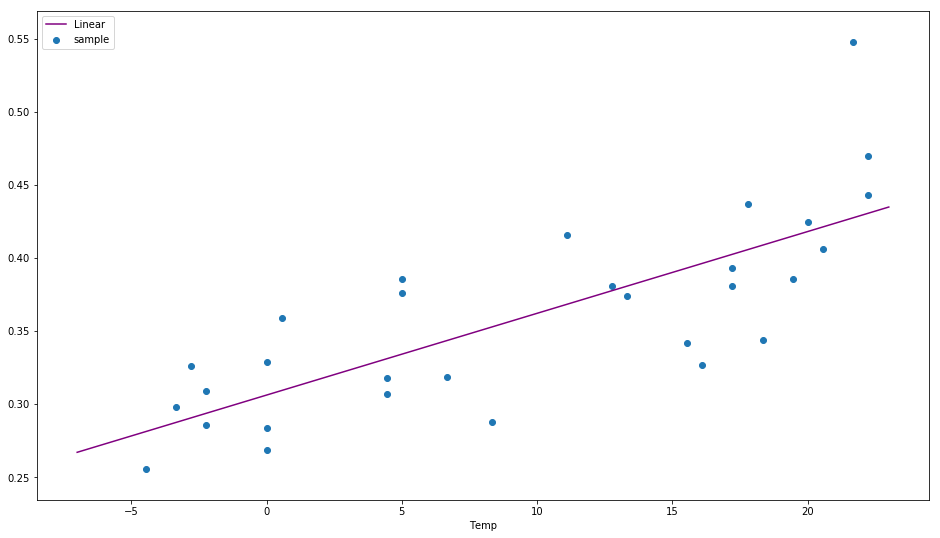

In [23]:
plt.figure(figsize=(16, 9))
grid = np.linspace(-7, 23, 500)
plt.scatter(data['temp'], data['IC'], label='sample')
plt.plot(grid, estimations.theta[1] * grid + estimations.theta[0], label='Linear', color='purple')
plt.xlabel('Temp')
plt.legend()
plt.show()

График совпал с графиком из презентации. Значит, пока всё правильно

Теперь учтите влияние года (столбец `Year`) для двух случаев:
* модель $ic = \theta_1 + \theta_2\ t + \theta_3 y_1 + \theta_4 y_2$, где $y_1 = I\{1\ год\}, y_2 = I\{2\ год\}$. Поясните, почему нельзя рассмативать одну переменную $y$ --- номер года.
* для каждого года рассматривается своя линейная зависимость $ic = \theta_1 + \theta_2\ t$.

В каждом случае нарисуйте графики. Отличаются ли полученные результаты? От чего это зависит? Как зависит потребление мороженного от года? 

** Первая модель **

In [29]:
data['indicator_1st_year'] = (list(map(lambda x: int(x), data['Year'] == 1)))
data['indicator_2nd_year'] = (list(map(lambda x: int(x), data['Year'] == 2)))
estimations = LinearRegression()
x = data[['temp', 'indicator_1st_year', 'indicator_2nd_year']].values
x = np.hstack((np.ones(shape=(x.shape[0], 1)), x))
y = data['IC'].values

estimations.fit(x, y)
estimations.summary()

Linear regression on 4 features and 30 examples
Sigma: 0.001016
		Lower		Estimation	Upper
theta_0:	0.251176	0.277050	0.302923
theta_1:	0.004741	0.006095	0.007449
theta_2:	-0.011237	0.016491	0.044218
theta_3:	0.041535	0.074307	0.107078


**Вторая модель**

In [32]:
estimation0 = LinearRegression()
estimation1 = LinearRegression()
estimation2 = LinearRegression()
arr = zip([estimation0, estimation1, estimation2], [0, 1, 2])

for estimation, year in arr:
    x = data[data['Year'] == year]
    x = x['temp'].values.reshape(x['temp'].values.shape[0], 1)
    x = np.hstack((np.ones_like(x), x))
    y = data[data['Year'] == year].IC.values
    estimation.fit(x, y)
    estimation.summary()

Linear regression on 2 features and 10 examples
Sigma: 0.001597
		Lower		Estimation	Upper
theta_0:	0.236963	0.286405	0.335846
theta_1:	0.001787	0.005277	0.008767
Linear regression on 2 features and 13 examples
Sigma: 0.000667
		Lower		Estimation	Upper
theta_0:	0.274993	0.297426	0.319859
theta_1:	0.003935	0.005672	0.007409
Linear regression on 2 features and 7 examples
Sigma: 0.000766
		Lower		Estimation	Upper
theta_0:	0.303805	0.338346	0.372886
theta_1:	0.004907	0.007877	0.010846


Построим графики

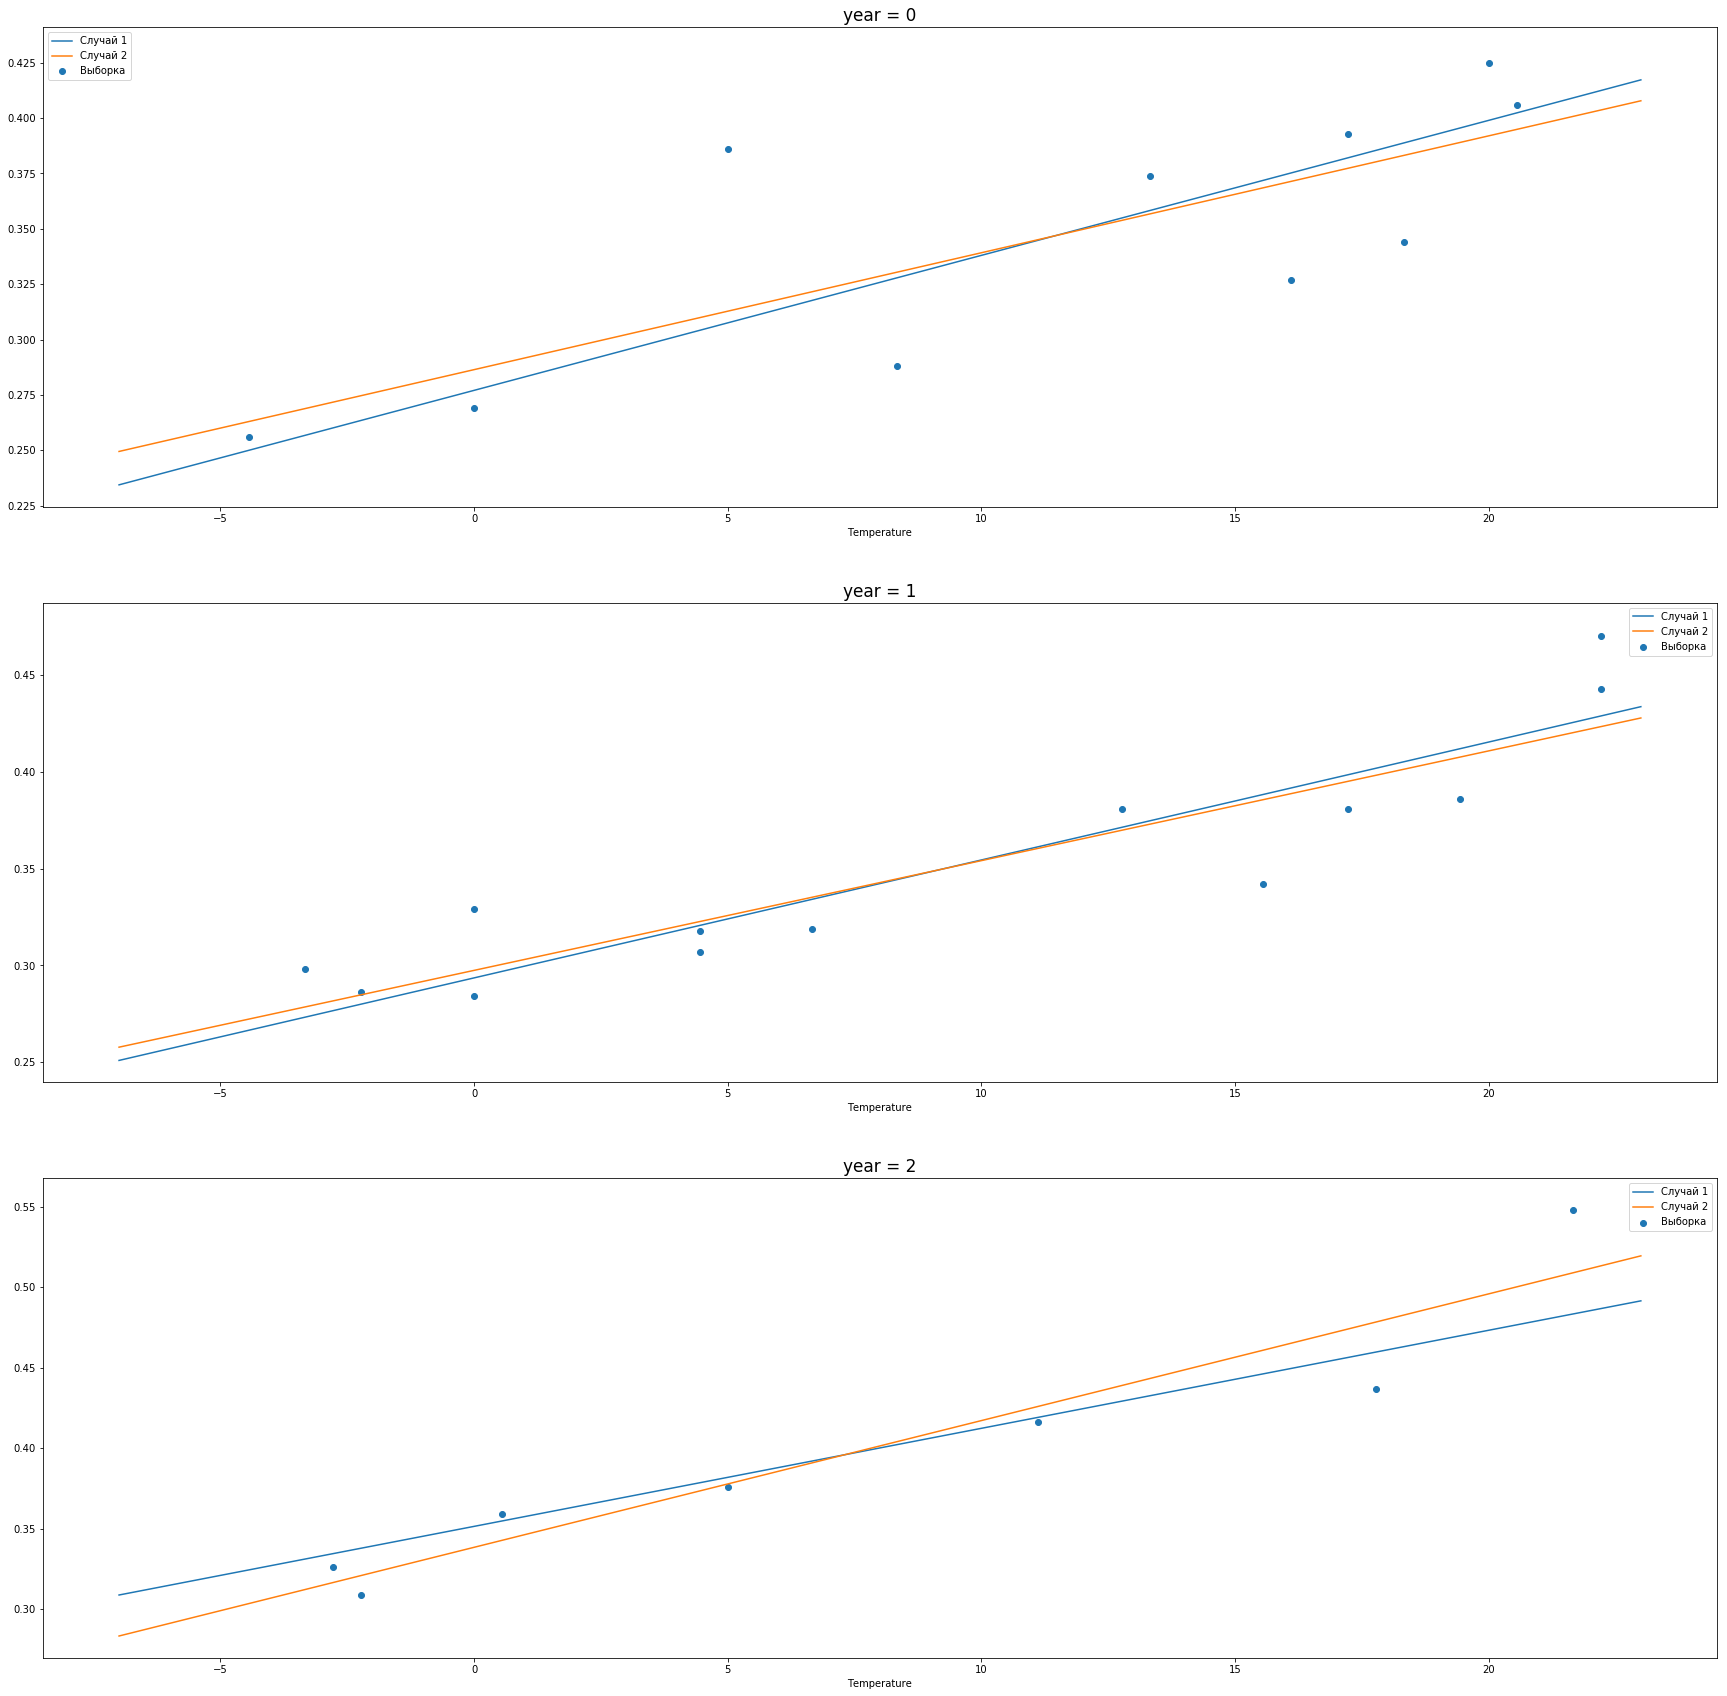

In [43]:
plt.figure(figsize=(30, 30))
grid = np.linspace(-7, 23, 500)
arr = zip([1, 2, 3], [estimation0, estimation1, estimation2], [0, 1, 2])

for i, est, year in arr:
    plt.subplot(3, 1, i)
    sample = data[data['Year'] == year].temp
    y = data[data['Year'] == year].IC
    plt.scatter(sample, y, label='Выборка')
    theta_1 = estimations.theta
    plt.plot(grid, theta_1[0] + theta_1[1]*grid + theta_1[2] * (year == 1) + theta_1[3] * (year == 2), label='Случай 1')
    theta_2 = est.theta
    
    plt.plot(grid, theta_2[0] + theta_2[1] * grid, label='Случай 2')
    plt.legend(fontsize = 10)
    plt.xlabel('Temperature')
    plt.title('year = {}'.format(year), fontsize=17)
plt.show()

Как ни странно, графики различаюся несильно, несмотря на то, что в первом случае обучение происходит на всем sample, а во втором случае обучение происходит только по одному выбранному году. Из графиков видно, что потребление мороженого во второй год ощутимо выше, чем в первый и нулевой

Наконец, обучите модель на предсказание потребления мороженного в зависимости от всех переменных.
Не забудьте, что для года нужно ввести две переменных.
Для полученной модели выведите `summary`.

In [44]:
x = data.drop(['date', 'Year', 'IC'], axis=1).values
y = data['IC'].values
estimations = LinearRegression()
estimations.fit(x, y)
estimations.summary()

Linear regression on 6 features and 30 examples
Sigma: 0.001233
		Lower		Estimation	Upper
theta_0:	-0.145322	1.042379	2.230081
theta_1:	-0.004028	-0.000038	0.003951
theta_2:	0.004574	0.006460	0.008346
theta_3:	-0.001113	-0.000180	0.000753
theta_4:	-0.023702	0.010091	0.043884
theta_5:	0.007848	0.078241	0.148635


Но это еще не все.
Постройте теперь линейную регрессию для модели $ic = \theta_1 + \theta_2\ t + \theta_3\ t^2 + \theta_4\ t^3$.
Выведите для нее summary и постройте график предсказания, то есть график кривой $ic = \widehat{\theta}_1 + \widehat{\theta}_2\ t + \widehat{\theta}_3\ t^2 + \widehat{\theta}_4\ t^3$. Хорошие ли получаются результаты?

In [45]:
x = data['temp'].values
x = x.reshape(x.shape[0], 1)
x = np.hstack((x**0, x ** 1, x**2, x**3))
estimations = LinearRegression()
estimations.fit(x, y)
estimations.summary()

Linear regression on 4 features and 30 examples
Sigma: 0.001529
		Lower		Estimation	Upper
theta_0:	0.295294	0.319902	0.344510
theta_1:	0.000388	0.007200	0.014013
theta_2:	-0.001861	-0.000855	0.000152
theta_3:	0.000002	0.000038	0.000073


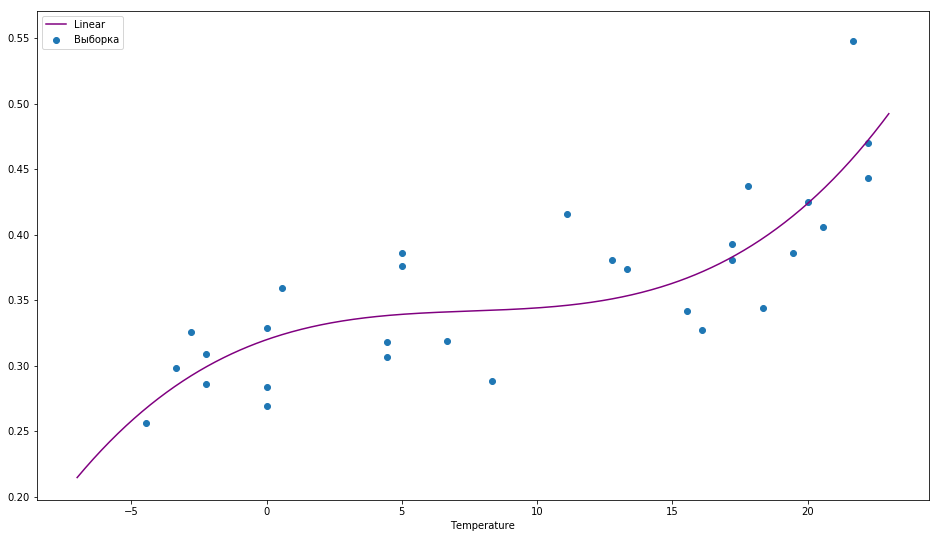

In [46]:
theta = estimations.theta

plt.figure(figsize=(16, 9))
grid = np.linspace(-7, 23, 500)
plt.scatter(data['temp'], data['IC'], label='Выборка')
plt.plot(grid, theta[0] + theta[1] * grid + theta[2] * grid ** 2 + theta[3] * grid ** 3, color='purple', label='Linear')
plt.legend()
plt.xlabel('Temperature')
plt.show()

Получились хорошие результаты

Чтобы понять, почему так происходит, выведите значения матрицы $(X^T X)^{-1}$ для данной матрицы и посчитайте для нее индекс обусловленности $\sqrt{\left.\lambda_{max}\right/\lambda_{min}}$, где $\lambda_{max}, \lambda_{min}$ --- максимальный и минимальный собственные значения матрицы $X^T X$. Собственные значения можно посчитать функцией <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvals.html">`scipy.linalg.eigvals`</a>.

Прокомментируйте полученные результаты. Помочь в этом может следующая <a href="https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%BE_%D0%BE%D0%B1%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8">статья</a>.

In [48]:
eigenvalues = np.linalg.eigvals(np.linalg.inv(x.T @ x))
conditioning_index = np.sqrt(max(eigenvalues) / min(eigenvalues))
print(conditioning_index)

8140.3947489


Индекс обусловленности получился очень большим, что показывает существование линейной зависимости между параметрами регрессионной модели

**Задача 2.** В данной задаче нужно реализовать функцию отбора признаков для линейной регрессии. Иначе говоря, пусть есть модель $y = \theta_1 x_1 + ... + \theta_k x_k$. Нужно определить, какие $\theta_j$ нужно положить равными нулю, чтобы качество полученной модели было максимальным.

Для этого имеющиеся данные нужно случайно разделить на две части --- обучение и тест (train и test). На первой части нужно обучить модель регресии, взяв некоторые из признаков, то есть рассмотреть модель $y = \theta_{j_1} x_{j_1} + ... + \theta_{j_s} x_{j_s}$. По второй части нужно посчитать ее качество --- среднеквадратичное отклонение (mean squared error) предсказания от истинного значения отклика, то есть величину
$$MSE = \sum\limits_{i \in test} \left(\widehat{y}(x_i) - Y_i\right)^2,$$
где $x_i = (x_{i,1}, ..., x_{i,k})$, $Y_i$ --- отклик на объекте $x_i$, а $\widehat{y}(x)$ --- оценка отклика на объекте $x$.

Если $k$ невелико, то подобным образом можно перебрать все поднаборы признаков и выбрать наилучший по значению MSE.

Для выполнения задания воспользуйтесь следующими функциями:
* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">`sklearn.linear_model.LinearRegression`</a>
--- реализация линейной регрессии. В данной реализации свободный параметр $\theta_1$ по умолчанию автоматически включается в модель. Отключить это можно с помощью `fit_intercept=False`, но это не нужно. *В данной задаче требуется, чтобы вы воспользовались готовой реализацией линейной регрессии, а не своей. Ведь на практике важно уметь применять готовые реализации, а не писать их самостоятельно.*

* <a href="http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html">`sklearn.cross_validation.train_test_split`</a>
--- функция разбиения данных на train и test. Установите параметр `test_size=0.3`.

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">`sklearn.metrics.mean_squared_error`</a>
--- реализация MSE.

Для перебора реализуйте функцию.

In [6]:
!C:/wget/wget.exe "http://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data"

--2017-05-21 00:10:28--  http://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11487 (11K) [text/plain]
Saving to: 'yacht_hydrodynamics.data'

     0K .......... .                                          100% 1.01M=0.01s

2017-05-21 00:10:28 (1.01 MB/s) - 'yacht_hydrodynamics.data' saved [11487/11487]



In [30]:
def best_features(X_train, X_test, Y_train, Y_test):
    mses = []  # сюда записывайте значения MSE
    k = X_train.shape[1]

    for j in range(1, 2 ** k):  # номер набора признаков
        mask = np.array([j & (1 << s) for s in range(k)], dtype=bool)
        features_numbers = np.arange(k)[mask]  # набор признаков
        regression = LR()
        regression.fit(X_train[:, features_numbers], Y_train)
        predictions = regression.predict(X_test[:, features_numbers])
        mse = mean_squared_error(Y_test, predictions)  # MSE для данного набора признаков
        mses.append(mse)
        
    # Печать 10 лучших наборов
    print('mse\t features')
    mses = np.array(mses)
    best_numbres = np.argsort(mses)[:10]
    for j in best_numbres:
        mask = np.array([j & (1 << s) for s in range(k)], dtype=bool)
        features_numbers = np.arange(k)[mask]
        print('%.3f\t' % mses[j], features_numbers)

Примените реализованный отбор признаков к датасетам
* <a href="http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics">Yacht Hydrodynamics</a> --- для парусных яхт нужно оценить остаточное сопротивление на единицу массы смещения (последний столбец) в зависимости от различных характеристик яхты.

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston">Boston Housing Prices</a> --- цены на дома в Бостоне в зависимости от ряда особенностей.

In [27]:
from sklearn.datasets import load_boston

In [28]:
captions = ['position of the center of buoyancy', 'Prismatic coefficient', 
 'Length-displacement ratio', 'Beam-draught ratio', 'Length-beam ratio', 
 'Froude number', 'Residuary resistance per unit weight of displacement']
boats = pd.read_csv('yacht_hydrodynamics.data', header=None, names=captions, delim_whitespace=True)
boats.head()

,position of the center of buoyancy,Prismatic coefficient,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,Froude number,Residuary resistance per unit weight of displacement
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(boats.values[:, :6], boats.values[:, 6], test_size=0.3, random_state=35)
best_features(X_train, X_test, Y_train, Y_test)

mse	 features
96.418	 [1 5]
96.450	 [1 4 5]
96.529	 [0 5]
96.561	 [0 4 5]
96.703	 [1 2 5]
96.722	 [5]
96.773	 [4 5]
96.813	 [0 2 5]
96.822	 [0 1 2 3 4]
96.873	 [0 1 2 3 5]


Можно заметить, что пятый столбец(число Фруда) появляется чаще всего, поэтому является самым сильным признаком.

In [38]:
boston = load_boston()

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=35)
best_features(X_train, X_test, Y_train, Y_test)

mse	 features
23.289	 [ 0  4  5  6  7  8  9 10 11 12]
23.291	 [ 0  4  5  7  8  9 10 11 12]
23.355	 [ 0  2  4  5  6  7  8  9 10 11 12]
23.357	 [ 0  2  4  5  7  8  9 10 11 12]
23.539	 [ 1  4  5  6  7  8  9 10 11 12]
23.541	 [ 1  4  5  7  8  9 10 11 12]
23.585	 [ 1  2  4  5  6  7  8  9 10 11 12]
23.586	 [ 0  4  5  6  7  8  9 10 12]
23.587	 [ 1  2  4  5  7  8  9 10 11 12]
23.595	 [ 0  2  3  4  5  7  8  9 10 11 12]


Как видим, почти все столбцы появляются везде, соответственно, качественная модель получается при объединении всех параметров

**Задача 3<font size="5" color="red">\*</font>.** Загрузите <a href="http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt">датасет</a>, в котором показана зависимость веса мозга от веса туловища для некоторых видов млекопитающих. Задача состоит в том, чтобы подобрать по этим данным хорошую модель регрессии. Для этого, можно попробовать взять некоторые функции от значения веса туловища, например, степенную, показательную, логарифмическую. Можно также сделать преобразование значений веса мозга, например, прологарифмировать. Кроме того, можно разбить значения веса туловища на несколько частей и на каждой части строить свою модель линейной регрессии.

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Какой вывод можно сделать?

Знаем следующие ограничения:
$\frac{n S^2}{u_{p_1}} \leq \sigma^2 \leq \frac{n S^2}{u_{p_2}}$

и

$\sigma^2 \geq \frac{n(\overline{X} - a)^2}{z^2_{\frac{\beta + 1}{2}}}$

$z_{\alpha}$ - квантиль стандартного нормального распределения, $u_{\alpha}$ -- $\alpha$ - квантиль $\chi^2_{n-1}$, а числа $\beta, \gamma, p_1, p_2$ удовлетворяют соотношениям: $\beta \gamma = \alpha$, $p_2 - p_1 = \alpha_2$.

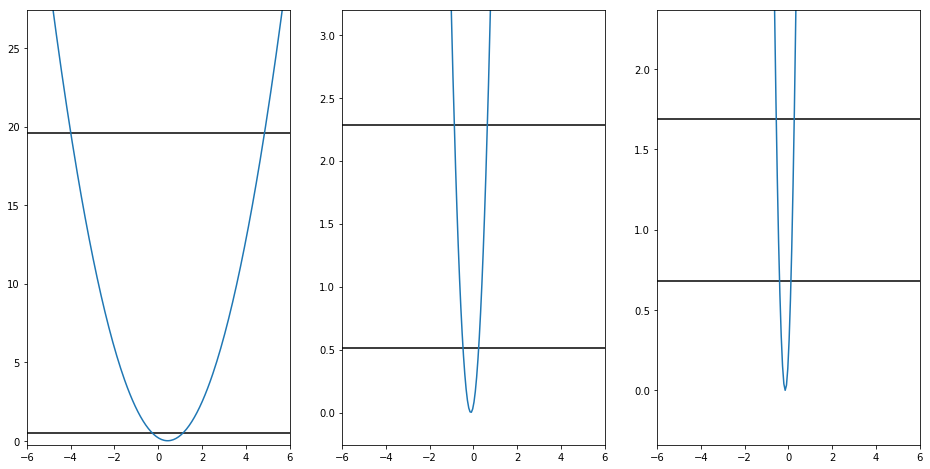

In [46]:
alpha = 0.95
ns = [5, 20, 50]
beta = np.sqrt(alpha)
gamma = alpha / beta

plt.figure(figsize=(16, 8))
for n, i in zip(ns, [1, 2, 3]):
    sample = sps.norm.rvs(size=n)
    plt.subplot(1, 3, i)
    u_p1, u_p2 = sps.chi2.interval(gamma, n - 1)
    up = (n * (np.mean(sample ** 2) - np.mean(sample) ** 2)) / u_p1
    down = (n * (np.mean(sample ** 2) - np.mean(sample) ** 2)) / u_p2
    parabolas = lambda a: n * (sample.mean() - a) ** 2 / sps.norm.ppf((beta + 1) / 2) ** 2
    grid = np.linspace(-15, 15, 500)
    plt.plot(grid, list(map(lambda x: parabolas(x), grid)))
#    plt.fill_betweenx()
    plt.hlines(down, -6, 6)
    plt.hlines(up, -6, 6)
    plt.ylim(-0.5 * down, 1.4 * up)
    plt.xlim(-6, 6)
plt.show()

Итак, мы смогли получить относительно небольшую доверительную область даже без знания медианы и среднего для распределения

**Задача 5<font size="5" color="red">\*</font>.** 
Пусть дана линейная гауссовская модель $Y = X\theta + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, \beta^{-1}I_n)$.
Пусть $\theta$ имеет априорное распределение $\mathcal{N}(0, \alpha^{-1}I_k)$. 
Такая постановка задачи соответствует Ridge-регрессии.
Оценкой параметров будет математическое ожидание по апостериорному распределению, аналогично можно получить доверительный интервал.
Кроме того, с помощью апостериорного распределения можно получить доверительный интервал для отклика на новом объекте, а не только точечную оценку.

Реализуйте класс RidgeRegression подобно классу LinearRegression, но добавьте в него так же возможность получения доверительного интервала для отклика на новом объекте.
Примените модель к некоторых датасетам, которые рассматривались в предыдущих задачах.
Нарисуйте графики оценки отклика на новом объекте и доверительные интервалы для него.

## 2. Проверка статистических гипотез

**Задача 6.** 
Существует примета, что если перед вам дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 
Пусть $X_1, ..., X_n \sim Bern(p)$ --- проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ --- неизвестная вероятность такого события. 
Нужно проверить гипотезу $H_0: p=1/2$ (отсутствие связи между черным котом и неудачей) против альтернативы $H_1: p>1/2$ (неудача происходит чаще если черный кот перебегает дорогу).

Известно, что $S = \left\{T(X) > c_\alpha\right\}$, где $T(X) = \sum X_i$, является равномерно наиболее мощным критерием для данной задачи. 
Чему при этом равно $c_\alpha$?
При этом p-value в данной задаче определяется как $p(t) = \mathsf{P}_{0.5}(T(X) > t)$, где $t = \sum x_i$ --- реализация статистики $T(X)$.

Для начала проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$.
В каждом случае найдите значение $c_\alpha$ и p-value.
Оформите это в виде таблицы.

Пользуйтесь функциями из `scipy.stats`, про которые подробно написано в файле `python_5`. Внимательно проверьте правильность строгих и нестрогих знаков.

$T(X) \sim Bin(n, \theta)$. Тогда $c_\alpha =  z_{1-\alpha}$ - квантиль Bin(n, \theta_0)$

In [54]:
alpha = 0.05
ns = [5, 10, 20, 40, 80, 150]
stats = []

for n in ns:
    T = np.sum(sps.bernoulli(p = 0.5).rvs(size=n))
    pval = sps.binom(n, 0.5).sf(T)
    c = sps.binom(n=n, p=0.5).ppf(-alpha + 1)
    stats.append([n, T, c, pval])
pd.DataFrame(data = stats, columns = ['n', 'T', 'c', 'pval'])

,n,T,c,pval
0,5,3,4.0,0.187500
1,10,3,8.0,0.828125
2,20,15,14.0,0.005909
3,40,22,25.0,0.214795
4,80,52,47.0,0.002434
5,150,66,85.0,0.917547


Для каких истинных значений $p$ с точки зрения практики можно считать, что связь между черным котом и неудачей есть? 
Теперь сгенерируйте 10 выборок для двух случаев: 1). $n=5, p=0.75$; 2). $n=10^5, p=0.51$. 
В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 - отвергается ли $H_0$ (выводите 1, если отвергается).
Какие выводы можно сделать?

In [64]:
alpha = 0.05
ns = [5, 100000]
ps = [0.75, 0.51]
stats = []
for n, p in zip(ns, ps):
    T = np.sum(sps.bernoulli(p = p).rvs(size = n))
    pval = sps.binom(n, 0.5).sf(T)
    c = sps.binom(n = n, p = 0.5).ppf(-alpha + 1)
    stats.append([n, T, c, pval])
frame = pd.DataFrame(data = stats, columns = ['n', 'T', 'c', 'pval'])
frame['H0'] = list(map(lambda x:int(x), frame['pval'] <= alpha))
frame

,n,T,c,pval,H0
0,5,4,4.0,3.125000e-02,1
1,100000,51043,50260.0,2.057071e-11,1


В обоих случаях гипотеза отсутствия связи между черным котом и неудачей была отвергнута

Возникает задача подбора оптимального размера выборки.

Для этого сначала зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
В противном случае отклонение с практической точки зрения признается несущественным.

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.
Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 1). $1/2 < p < p^*$; 2). $p > p^*$.
Сделайте вывод.

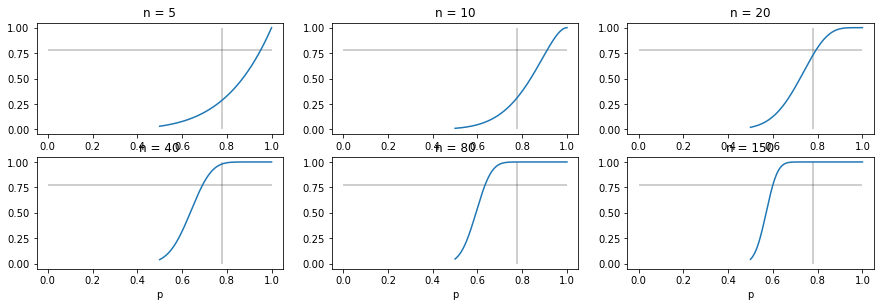

In [72]:
p = 0.7777777 # 7 семёрок
alpha = 0.05
ns = [5, 10, 20, 40, 80, 150]
ps = np.linspace(0.5, 1, 500)

plt.figure(figsize = (15, 7))
arr = zip(np.arange(1, len(ns) + 1), ns)
for i, n in arr:
    plt.subplot(3, 3, i)
    plt.plot(ps, sps.binom.sf(sps.binom(n = n, p = 0.5).ppf(-alpha + 1), n = n, p = ps))
    plt.title('n = ' + str(n))
    plt.vlines(p, 0, 1, alpha=0.25)
    plt.hlines(p, 0, 1, alpha=0.25)
    plt.xlabel('p')

plt.show()

Видимо из графика, что при размере выборки, равном 20, график в точности проходит через точку $(p, p)$
Для этого $n*$ нужно провести эксперимент, аналогичный проведенным ранее

In [73]:
alpha = 0.05
n = 20
ps = [0.6, 0.7, 0.875, 0.95]
stats = []
for p in ps:
    T = np.sum(sps.bernoulli(p = p).rvs(size = n))
    pval = sps.binom(n = n, p = 0.5).sf(T)
    c = sps.binom(n = n, p = 0.5).ppf(-alpha + 1)
    stats.append([n, T, c, pval])
frame = pd.DataFrame(data = stats, columns = ['n', 'T', 'c', 'pval'])
frame['H0'] = list(map(lambda x:int(x), frame['pval'] <= alpha))
frame

,n,T,c,pval,H0
0,20,10,14.0,0.411901,0
1,20,13,14.0,0.057659,0
2,20,17,14.0,0.000201,1
3,20,17,14.0,0.000201,1


Как видим, при $p < p^*$, мы не можем отвергнуть $H_0$, при $p > p^*$, наоборот, отвергаем. $p = 0.8$ является некой граничной точкой

**Вывод** Я научился проверять статические гипотезы и подбирать оптимальное числе элементов в выборке

### Справка для выполнения следующих задач

**Критерий согласия хи-квадрат**

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare>`scipy.stats.chisquare`</a>`(f_obs, f_exp=None, ddof=0)`

`f_obs` --- число элементов выборки, попавших в каждый из интервалов

`f_exp` --- ожидаемое число элементов выборки (по умолчанию равномерное)

`ddof` --- поправка на число степеней свободы. Статистика асимптотически будет иметь распределение хи-квадрат с числом степеней свободы $k - 1 - ddof$, где $k$ --- число интервалов.

Возвращает значение статистики критерия и соответствующее p-value.

**Критерий согласия Колмогорова**

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest>`scipy.stats.kstest`</a>`(rvs, cdf, args=())`

`rvs` --- выборка

`cdf` --- функция распределения (сама функция или ее название)

`args` --- параметры распределения

Возвращает значение статистики критерия и соответствующее p-value.

**Задача 7.**

* Проверьте, что ваша выборка значений скорости ветра из задания 2 действительно согласуется с распределением Вейбулла.

* Проверьте, что при больших $n$ распределение статистики из задач 3 и 4 задания 2 действительно хорошо приближают предельное распределение.

* Проверьте, что остатки в регрессии из задач выше нормальны.

* Подберите класс распределений для выборки количества друзей из задания 1.

Использовать можно два описанных выше критерия, либо любой другой критерий, если будет обоснована необходимость его применения в данной задаче, а так же будет приведено краткое описание критерия.
Уровень значимости взять равным 0.05.

**Задача 8<font size="5" color="red">\*</font>.** Проведите исследование согласно примеру 2 параграфа 2 главы 18 книги М.Б. Лагутина "Наглядная математическая статистика".

**Задача 9<font size="5" color="red">\*</font>.** 
Изучите Q-Q plot и критерий Шапиро-Уилка для проверки нормальности, напишите их теоретическое пояснение.
В изучении могут помочь материалы курса <a href="http://wiki.cs.hse.ru/%D0%9F%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4%D0%BD%D0%BE%D0%B9_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85"> ПСАД</a>.

Постройте графики Q-Q plot для различных распределений и дайте к ним пояснение.
Проверьте различные данные на нормальность с помощью различных критериев и Q-Q plot.
Данные можно использовать из задачи 7 или какие-либо еще, например, отдельные компоненты из Ирисов Фишера.
Постарайтесь так же правильно контролировать вероятность общей ошибки первого рода.